In [18]:
#Analysis packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Scraping packages
import requests
import re
from bs4 import BeautifulSoup
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
url = 'https://www.unitstatistics.com/ssbu/'
result = requests.get(url)
print(result.status_code)

200


In [3]:
soup = BeautifulSoup(result.content, 'html.parser')
soup

<!DOCTYPE html>

<html lang="en-US">
<head><script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','//www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-24185965-21', 'auto');
  ga('send', 'pageview');

</script>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="http://gmpg.org/xfn/11" rel="profile"/>
<title>Super Smash Bros Ultimate – Unit Statistics</title>
<meta content="max-image-preview:large" name="robots">
<link href="//cdnjs.cloudflare.com" rel="dns-prefetch">
<link href="//fonts.googleapis.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://fonts.gstatic.com" rel="preconnect"/>
<link href="https://www.unitstatistics.com/feed/" rel="alternate" title="Unit Statistics » Feed" type

In [10]:
character = soup.find('tr', class_='row-9 odd')

tier_test = character.find('td', class_='column-2').text
tier_test

'3'

In [4]:
def match_class(class_name):
    return class_name and re.compile(r'row-\d+').search(class_name)

rows = soup.find_all('tr', class_=match_class)
characters = rows[1:]

In [5]:
fighter=[]
tier=[]
grab_range=[]
air_acc_base=[]
air_acc_additional=[]
air_acc_max=[]
air_speed=[]
reg_fall=[]
fast_fall=[]
fallspeed_inc=[]
gravity=[]
fullhop=[]
shorthop=[]
doublejump=[]
fullhop_duration=[]
shorthop_duration=[]
fastfullhop_duration=[]
weight=[]
walkspeed=[]
dashspeed=[]
runspeed=[]
dashframes=[]
pivot_dashframes=[]

for character in characters:
    
    fighter.append(character.find('td', class_='column-1').text)
    tier.append(character.find('td', class_='column-2').text)
    grab_range.append(character.find('td', class_='column-3').text)
    
    air_acc_base.append(character.find('td', class_='column-4').text)
    air_acc_additional.append(character.find('td', class_='column-5').text)
    air_acc_max.append(character.find('td', class_='column-6').text)
    air_speed.append(character.find('td', class_='column-7').text)
    
    reg_fall.append(character.find('td', class_='column-8').text)
    fast_fall.append(character.find('td', class_='column-9').text)
    fallspeed_inc.append(character.find('td', class_='column-10').text)
    gravity.append(character.find('td', class_='column-11').text)
    
    fullhop.append(character.find('td', class_='column-12').text)
    shorthop.append(character.find('td', class_='column-13').text)
    doublejump.append(character.find('td', class_='column-14').text)
    
    fullhop_duration.append(character.find('td', class_='column-16').text)
    shorthop_duration.append(character.find('td', class_='column-17').text)
    fastfullhop_duration.append(character.find('td', class_='column-18').text)
    weight.append(character.find('td', class_='column-19').text)
    
    walkspeed.append(character.find('td', class_='column-20').text)
    dashspeed.append(character.find('td', class_='column-21').text)
    runspeed.append(character.find('td', class_='column-22').text)
    
    dashframes.append(character.find('td', class_='column-23').text)
    pivot_dashframes.append(character.find('td', class_='column-24').text)




In [6]:
d = {"Fighter": fighter,
     "Tier": tier,
     "Grab Range": grab_range,
     "Base Air Acceleration": air_acc_base,
     "Additional Air Acceleration": air_acc_additional,
     "Max Air Acceleration": air_acc_max,
     "Air Speed": air_speed,
     "Fall Speed": reg_fall,
     "Fast Fall Speed": fast_fall,
     "Normal-Fast Fall Speed Increase %": fallspeed_inc,
     "Gravity": gravity,
     "Full Hop Height": fullhop,
     "Short Hop Height": shorthop,
     "Double Jump Height": doublejump,
     "Full Hop Duration": fullhop_duration,
     "Short Hop Duration": shorthop_duration,
     "Fast Fall Duration from Full Hop": fastfullhop_duration,
     "Weight": weight,
     "Walk Speed": walkspeed,
     "Initial Dash Speed": dashspeed,
     "Dash Frames": dashframes,
     "Pivot Dash Frames": pivot_dashframes}

smash = pd.DataFrame(d)
smash.head()

,Fighter,Tier,Grab Range,Base Air Acceleration,Additional Air Acceleration,Max Air Acceleration,Air Speed,Fall Speed,Fast Fall Speed,Normal-Fast Fall Speed Increase %,...,Short Hop Height,Double Jump Height,Full Hop Duration,Short Hop Duration,Fast Fall Duration from Full Hop,Weight,Walk Speed,Initial Dash Speed,Dash Frames,Pivot Dash Frames
0,Banjo & Kazooie,6,132,??,??,0.07,0.92,1.76,2.816,0.6,...,??,??,44,25,31,106,1.06,1.68,10,12
1,Bayonetta,4,125,0.01,0.085,0.095,1.019,1.77,2.832,0.6,...,21.35,42,50,27,35,81,0.945,1.936,10,12
2,Bowser,4,200,0.01,0.04,0.05,1.155,1.77,2.832,0.6,...,15.7,32.61,45,22,31,135,901,2.255,13,15
3,Bowser Jr.,6,180,0.01,0.07,0.08,1.134,1.65,2.64,0.6,...,16.59,34.4,52,26,36,108,0.924,1.76,10,12
4,Byleth,4,123,0.01,0.043,0.053,0.89,1865,2.4,0.6,...,??,??,45,24,31,97,0.97,1.8,10,12


In [7]:
#convert '??' to NA to be changed later
smash = smash.replace('??', np.nan)

#convert numeric columns to numeric float type
for column in smash.columns[1:]:
    smash[column] = smash[column].str.strip().astype(float)

smash['Fighter'] = smash['Fighter'].str.strip()

In [8]:
#confirm all data types are correct
smash.dtypes


Fighter                               object
Tier                                 float64
Grab Range                           float64
Base Air Acceleration                float64
Additional Air Acceleration          float64
Max Air Acceleration                 float64
Air Speed                            float64
Fall Speed                           float64
Fast Fall Speed                      float64
Normal-Fast Fall Speed Increase %    float64
Gravity                              float64
Full Hop Height                      float64
Short Hop Height                     float64
Double Jump Height                   float64
Full Hop Duration                    float64
Short Hop Duration                   float64
Fast Fall Duration from Full Hop     float64
Weight                               float64
Walk Speed                           float64
Initial Dash Speed                   float64
Dash Frames                          float64
Pivot Dash Frames                    float64
dtype: obj

c:\Users\dallb\anaconda3\envs\stat386\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Additional Air Acceleration', ylabel='Count'>

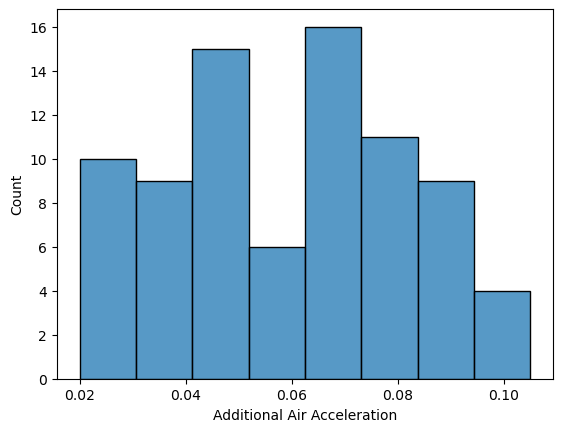

In [91]:
sns.histplot(data=smash, x='Additional Air Acceleration')

In [9]:
smash.loc[smash['Fighter']=='Byleth', 'Fall Speed'] = 1.6
smash.head()

,Fighter,Tier,Grab Range,Base Air Acceleration,Additional Air Acceleration,Max Air Acceleration,Air Speed,Fall Speed,Fast Fall Speed,Normal-Fast Fall Speed Increase %,...,Short Hop Height,Double Jump Height,Full Hop Duration,Short Hop Duration,Fast Fall Duration from Full Hop,Weight,Walk Speed,Initial Dash Speed,Dash Frames,Pivot Dash Frames
0,Banjo & Kazooie,6.0,132.0,NaN,NaN,0.070,0.920,1.76,2.816,0.6,...,NaN,NaN,44.0,25.0,31.0,106.0,1.060,1.680,10.0,12.0
1,Bayonetta,4.0,125.0,0.01,0.085,0.095,1.019,1.77,2.832,0.6,...,21.35,42.00,50.0,27.0,35.0,81.0,0.945,1.936,10.0,12.0
2,Bowser,4.0,200.0,0.01,0.040,0.050,1.155,1.77,2.832,0.6,...,15.70,32.61,45.0,22.0,31.0,135.0,901.000,2.255,13.0,15.0
3,Bowser Jr.,6.0,180.0,0.01,0.070,0.080,1.134,1.65,2.640,0.6,...,16.59,34.40,52.0,26.0,36.0,108.0,0.924,1.760,10.0,12.0
4,Byleth,4.0,123.0,0.01,0.043,0.053,0.890,1.60,2.400,0.6,...,NaN,NaN,45.0,24.0,31.0,97.0,0.970,1.800,10.0,12.0


In [10]:
#creates a dataframe showing me which characters have NA vals
na_list = smash.groupby('Fighter').apply(lambda x: x.isna().sum())
na_list.drop(index=na_list.index[(na_list==0).all(axis=1)], inplace=True)
na_list['Fighter'] = na_list.index

In [11]:
#NA populate fxn

def quicker(fighter, add=0, max=0, short=0, double=0, full=0):
    if pd.isna(smash.loc[smash['Fighter']==fighter, 'Additional Air Acceleration']).any():
        smash.loc[smash['Fighter']==fighter, 'Additional Air Acceleration'] = add 
    
    if pd.isna(smash.loc[smash['Fighter']==fighter, 'Max Air Acceleration']).any():
        smash.loc[smash['Fighter']==fighter, 'Max Air Acceleration'] = max 
    
    if pd.isna(smash.loc[smash['Fighter']==fighter, 'Short Hop Height']).any():
        smash.loc[smash['Fighter']==fighter, 'Short Hop Height'] = short

    if pd.isna(smash.loc[smash['Fighter']==fighter, 'Double Jump Height']).any():
        smash.loc[smash['Fighter']==fighter, 'Double Jump Height'] = double

    if pd.isna(smash.loc[smash['Fighter']==fighter, 'Full Hop Height']).any():
        smash.loc[smash['Fighter']==fighter, 'Full Hop Height'] = full  


In [12]:
#Taking care of NA values

#Base Air Acceleration is mostly the same across the roster
no_base_air = na_list[na_list['Base Air Acceleration'] == 1].index

smash.loc[smash['Fighter'].isin(no_base_air), 'Base Air Acceleration'] = smash['Base Air Acceleration'].median()

#Fill remaining values

#Banjo
quicker('Banjo & Kazooie', add=.06, max=.07, short=17.8, double=32, full=29.8)

#Byleth
quicker('Byleth', 0.043, 0.053, 14, 28.5, 26.5)

#Hero
quicker('Hero', 0.045, 0.055, 15.5, 31, 29)

#Ice Climbers
quicker('Ice Climbers', 0.08, 0.09, 16.75, 34.69, 34.69)

#Joker
quicker('Joker', 0.07, 0.08, 14.2, 34, 32.5)

#Kazuya
quicker('Kazuya', 0.03, 0.04, 12, 49, 18)

#Mythra
quicker('Mythra', 0.06, 0.07, 15.6, 33, 30.8)

#Pyra
quicker('Pyra', 0.055, 0.065, 15.2, 29, 26.3)

#Richter
quicker('Richter', 0.02, 0.03, 18, 29, 30)

#Sephiroth
quicker('Sephiroth', 0.07, 0.08, 10, 34, 30.5)
smash.loc[smash['Fighter']=='Sephiroth', 'Air Speed'] = 0.95
smash.loc[smash['Fighter']=='Sephiroth', 'Fall Speed'] = 1.84
smash.loc[smash['Fighter']=='Sephiroth', 'Fast Fall Speed'] = 2.944
smash.loc[smash['Fighter']=='Sephiroth', 'Normal-Fast Fall Speed Increase %'] = 0.6
smash.loc[smash['Fighter']=='Sephiroth', 'Gravity'] = 0.108

#Steve
quicker('Steve', 0.04, 0.05, 10, 22.5, 16.5)

#Terry
quicker('Terry', 0.05, 0.06, 15.2, 29, 27)


#make sure there are no more NA values
smash.isna().sum()

Fighter                              0
Tier                                 0
Grab Range                           0
Base Air Acceleration                0
Additional Air Acceleration          0
Max Air Acceleration                 0
Air Speed                            0
Fall Speed                           0
Fast Fall Speed                      0
Normal-Fast Fall Speed Increase %    0
Gravity                              0
Full Hop Height                      0
Short Hop Height                     0
Double Jump Height                   0
Full Hop Duration                    0
Short Hop Duration                   0
Fast Fall Duration from Full Hop     0
Weight                               0
Walk Speed                           0
Initial Dash Speed                   0
Dash Frames                          0
Pivot Dash Frames                    0
dtype: int64

In [33]:
#Drop 'Normal-Fast Fall Speed Increase %' column because vals are all the same 
smash.drop(columns='Normal-Fast Fall Speed Increase %', inplace=True)

In [34]:
#Cleaned data
smash.head()

,Fighter,Tier,Grab Range,Base Air Acceleration,Additional Air Acceleration,Max Air Acceleration,Air Speed,Fall Speed,Fast Fall Speed,Gravity,...,Short Hop Height,Double Jump Height,Full Hop Duration,Short Hop Duration,Fast Fall Duration from Full Hop,Weight,Walk Speed,Initial Dash Speed,Dash Frames,Pivot Dash Frames
0,Banjo & Kazooie,6.0,132.0,0.01,0.060,0.070,0.920,1.76,2.816,0.110,...,17.80,32.00,44.0,25.0,31.0,106.0,1.060,1.680,10.0,12.0
1,Bayonetta,4.0,125.0,0.01,0.085,0.095,1.019,1.77,2.832,0.120,...,21.35,42.00,50.0,27.0,35.0,81.0,0.945,1.936,10.0,12.0
2,Bowser,4.0,200.0,0.01,0.040,0.050,1.155,1.77,2.832,0.125,...,15.70,32.61,45.0,22.0,31.0,135.0,901.000,2.255,13.0,15.0
3,Bowser Jr.,6.0,180.0,0.01,0.070,0.080,1.134,1.65,2.640,0.092,...,16.59,34.40,52.0,26.0,36.0,108.0,0.924,1.760,10.0,12.0
4,Byleth,4.0,123.0,0.01,0.043,0.053,0.890,1.60,2.400,0.120,...,14.00,28.50,45.0,24.0,31.0,97.0,0.970,1.800,10.0,12.0


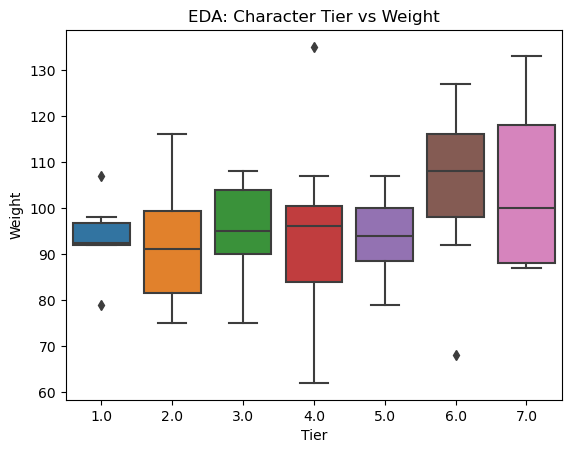

In [19]:
sns.boxplot(data=smash, x='Tier', y='Weight')
plt.title('EDA: Character Tier vs Weight')
plt.show()

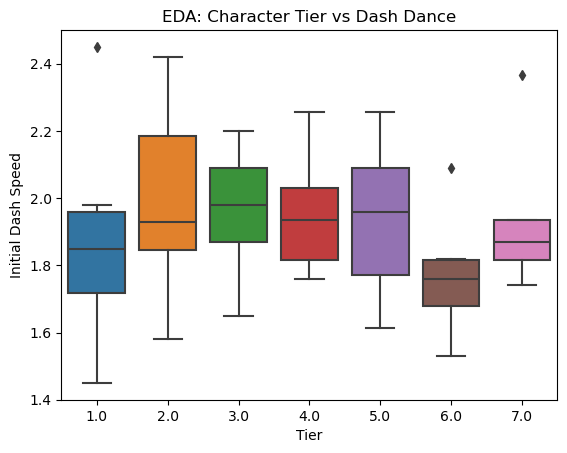

Index(['Fighter', 'Tier', 'Grab Range', 'Base Air Acceleration',
       'Additional Air Acceleration', 'Max Air Acceleration', 'Air Speed',
       'Fall Speed', 'Fast Fall Speed', 'Gravity', 'Full Hop Height',
       'Short Hop Height', 'Double Jump Height', 'Full Hop Duration',
       'Short Hop Duration', 'Fast Fall Duration from Full Hop', 'Weight',
       'Walk Speed', 'Initial Dash Speed', 'Dash Frames', 'Pivot Dash Frames',
       'DLC'],
      dtype='object')

In [40]:
sns.boxplot(data=smash, x='Tier', y='Initial Dash Speed')
plt.title('EDA: Character Tier vs Dash Dance')
plt.show()

smash.columns

In [31]:
#who has the top initial dash speed?
smash.loc[smash['Initial Dash Speed'].idxmax()]

Fighter                              Mythra
Tier                                    1.0
Grab Range                            120.0
Base Air Acceleration                  0.01
Additional Air Acceleration            0.06
Max Air Acceleration                   0.07
Air Speed                              1.22
Fall Speed                             1.31
Fast Fall Speed                       2.096
Normal-Fast Fall Speed Increase %       0.6
Gravity                               0.077
Full Hop Height                        30.8
Short Hop Height                       15.6
Double Jump Height                     33.0
Full Hop Duration                      41.0
Short Hop Duration                     21.0
Fast Fall Duration from Full Hop       29.0
Weight                                 92.0
Walk Speed                            0.907
Initial Dash Speed                     2.45
Dash Frames                            10.0
Pivot Dash Frames                      12.0
Name: 51, dtype: object

In [36]:
#Make DLC Column
dlc_fighters = ['Piranha Plant', 'Joker', 'Hero', 'Banjo & Kazooie', 'Terry', 'Byleth', 'Min Min', 'Steve', 'Sephiroth', 'Pyra', 'Mythra', 'Kazuya', 'Sora']
smash['DLC'] = 0

smash.loc[smash['Fighter'].isin(dlc_fighters), 'DLC'] = 1


In [145]:
smash.columns

Index(['Fighter', 'Tier', 'Grab Range', 'Base Air Acceleration',
       'Additional Air Acceleration', 'Max Air Acceleration', 'Air Speed',
       'Fall Speed', 'Fast Fall Speed', 'Normal-Fast Fall Speed Increase %',
       'Gravity', 'Full Hop Height', 'Short Hop Height', 'Double Jump Height',
       'Full Hop Duration', 'Short Hop Duration',
       'Fast Fall Duration from Full Hop', 'Weight', 'Walk Speed',
       'Initial Dash Speed', 'Dash Frames', 'Pivot Dash Frames', 'DLC'],
      dtype='object')

In [42]:
smash_reg = smash

import statsmodels.api as sm

# x_cols = ['Grab Range', 'Base Air Acceleration',
#        'Additional Air Acceleration', 'Max Air Acceleration', 'Air Speed',
#        'Fall Speed', 'Fast Fall Speed', 'Normal-Fast Fall Speed Increase %',
#        'Gravity', 'Full Hop Height', 'Short Hop Height', 'Double Jump Height',
#        'Full Hop Duration', 'Short Hop Duration',
#        'Fast Fall Duration from Full Hop', 'Weight', 'Walk Speed',
#        'Initial Dash Speed', 'Dash Frames', 'Pivot Dash Frames', 'DLC']

x_cols = ['DLC', 'Max Air Acceleration', 'Initial Dash Speed', 'Dash Frames']

x_df = smash_reg[x_cols]
x_df = sm.add_constant(x_df) #Add a constant term for the intercept

#Fit OLS model
model = sm.OLS(smash_reg['Tier'], x_df).fit()

#Model Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Tier   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     6.844
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           8.10e-05
Time:                        21:02:47   Log-Likelihood:                -156.90
No. Observations:                  89   AIC:                             323.8
Df Residuals:                      84   BIC:                             336.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.6072 

In [148]:
smash.to_csv('smash.csv', index=False)